In [1]:
%load_ext autoreload
%autoreload 2
%aimport -numpy, -matplotlib, -IPython
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import rasterio as rio
import l2a_analysis as l2aa
from helpers import *

In [2]:
locs = {
    "CH": "D:\\snap_data\\locations\\CH\\S2A_MSIL1C_20230903T101601_N0509_R065_T32TMS_20230903T140124.SAFE",
    "BRA": "D:\\snap_data\\locations\\BRA\\S2A_MSIL1C_20230909T141721_N0509_R010_T21MTS_20230909T192148.SAFE",
    "ALG": "D:\\snap_data\\locations\\ALG\\S2B_MSIL1C_20230904T103629_N0509_R008_T30RXT_20230904T125735.SAFE",
}

reference_modifications = [
    {
        "flag": "SEN2COR_REFERENCE",
        "value": "",
        "info": "Reference product",
        "name": "REFERENCE",
    }
]

lut_modifications = [
    {
        "flag": "SEN2COR_MODIFY_LUT_AEROSOL",
        "value": "MARITIME",
        "info": "Look Up Table Aerosol set to MARITIME",
        "name": "LUT_AEROSOL_MARITIME",
    },
    {
        "flag": "SEN2COR_MODIFY_LUT_SEASON",
        "value": "WINTER",
        "info": "Look Up Table Mid Latitude Season set to WINTER",
        "name": "LUT_SEASON_WINTER",
    },
    {
        "flag": "SEN2COR_MODIFY_LUT_OZONE",
        "value": "250",
        "info": "Look Up Table Ozone set to 250",
        "name": "LUT_OZONE_250",
    },
    # {
    #     "flag": "SEN2COR_MODIFY_LUT_OZONE",
    #     "value": "331",
    #     "info": "Look Up Table Ozone set to 331 (standard mid latitude summer)",
    #     "name": "LUT_OZONE_331",
    # },
    {
        "flag": "SEN2COR_MODIFY_LUT_OZONE",
        "value": "450",
        "info": "Look Up Table Ozone set to 450",
        "name": "LUT_OZONE_450",
    },
]

flag_modifications = [
    {
        "flag": "SEN2COR_MODIFY_FLAGS_WV",
        "value": "0",
        "info": "Turn off water vapour correction",
        "name": "FLAG_WV_OFF",
    },
    {
        "flag": "SEN2COR_MODIFY_FLAGS_CIRRUS",
        "value": "FALSE",
        "info": "Turn off cirrus correction",
        "name": "FLAG_CIRRUS_OFF",
    },
    {
        "flag": "SEN2COR_MODIFY_FLAGS_CIRRUS",
        "value": "TRUE",
        "info": "Turn on cirrus correction",
        "name": "FLAG_CIRRUS_ON",
    },
    {
        "flag": "SEN2COR_MODIFY_FLAGS_BRDF",
        "value": "1",
        "info": "Set BRDF correction to 1",
        "name": "FLAG_BRDF_1",
    },
    # {
    #     "flag": "SEN2COR_MODIFY_FLAGS_BRDF",
    #     "value": "2",
    #     "info": "Set BRDF correction to 2",
    #     "name": "FLAG_BRDF_2",
    # },
    {
        "flag": "SEN2COR_MODIFY_CALIB_VISIBILITY",
        "value": "20",
        "info": "Set visibility to 20km",
        "name": "CALIB_VISIBILITY_20",
    },
    # {
    #     "flag": "SEN2COR_MODIFY_CALIB_VISIBILITY",
    #     "value": "80",
    #     "info": "Set visibility to 80km",
    #     "name": "CALIB_VISIBILITY_80",
    # },
    # {
    #     "flag": "SEN2COR_MODIFY_CALIB_VISIBILITY",
    #     "value": "120",
    #     "info": "Set visibility to 120km",
    #     "name": "CALIB_VISIBILITY_120",
    # },
]

class_modifications = [
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "0",
        "info": "Set whole SCL layer to NO_DATA",
        "name": "class_NO_DATA",
    },
    # {
    #     'flag' : 'SEN2COR_MOD_const_class',
    #     'value' : '1',
    #     'info' : 'Set whole SCL layer to SATURATED_OR_DEFECTIVE',
    #     'name' : 'class_SATURATED_OR_DEFECTIVE'
    # },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "2",
        "info": "Set whole SCL layer to CASTED_SHADOWS",
        "name": "class_CASTED_SHADOWS",
    },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "3",
        "info": "Set whole SCL layer to CLOUD_SHADOWS",
        "name": "class_CLOUD_SHADOWS",
    },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "4",
        "info": "Set whole SCL layer to VEGETATION",
        "name": "class_VEGETATION",
    },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "5",
        "info": "Set whole SCL layer to NOT_VEGETATED",
        "name": "class_NOT_VEGETATED",
    },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "6",
        "info": "Set whole SCL layer to WATER",
        "name": "class_WATER",
    },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "7",
        "info": "Set whole SCL layer to UNCLASSIFIED",
        "name": "class_UNCLASSIFIED",
    },
    # {
    #     "flag": "SEN2COR_MOD_const_class",
    #     "value": "8",
    #     "info": "Set whole SCL layer to CLOUD_MEDIUM_PROBABILITY",
    #     "name": "class_CLOUD_MEDIUM_PROBABILITY",
    # },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "9",
        "info": "Set whole SCL layer to CLOUD_HIGH_PROBABILITY",
        "name": "class_CLOUD_HIGH_PROBABILITY",
    },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "10",
        "info": "Set whole SCL layer to THIN_CIRRUS",
        "name": "class_THIN_CIRRUS",
    },
    {
        "flag": "SEN2COR_MOD_const_class",
        "value": "11",
        "info": "Set whole SCL layer to SNOW",
        "name": "class_SNOW",
    },
]

In [3]:
mods = reference_modifications +  flag_modifications + lut_modifications + class_modifications

input_dir = Path("D:\\snap_data\\locations")
output_dir = Path("D:\\snap_data\\reports")

l2a_analysis = l2aa.L2A_Analysis(report_name="thesis", base_input_dir=input_dir, base_output_dir=output_dir)
l2a_analysis.set_locations(locs)
l2a_analysis.set_modifications(mods)

In [4]:
l2a_analysis.get_modification_names()

['REFERENCE',
 'FLAG_WV_OFF',
 'FLAG_CIRRUS_OFF',
 'FLAG_CIRRUS_ON',
 'FLAG_BRDF_1',
 'CALIB_VISIBILITY_20',
 'LUT_AEROSOL_MARITIME',
 'LUT_SEASON_WINTER',
 'LUT_OZONE_250',
 'LUT_OZONE_450',
 'class_NO_DATA',
 'class_CASTED_SHADOWS',
 'class_CLOUD_SHADOWS',
 'class_VEGETATION',
 'class_NOT_VEGETATED',
 'class_WATER',
 'class_UNCLASSIFIED',
 'class_CLOUD_HIGH_PROBABILITY',
 'class_THIN_CIRRUS',
 'class_SNOW']

In [5]:
l2a_analysis.run_sen2cor()


D:\snap_data\reports\thesis\CH\reference
CH:	reference already exists. Skipping...
D:\snap_data\reports\thesis\BRA\reference
BRA:	reference already exists. Skipping...
D:\snap_data\reports\thesis\ALG\reference
ALG:	reference already exists. Skipping...
CH:	REFERENCE already exists. Skipping...
BRA:	REFERENCE already exists. Skipping...
ALG:	REFERENCE already exists. Skipping...
CH:	FLAG_WV_OFF already exists. Skipping...
BRA:	FLAG_WV_OFF already exists. Skipping...
ALG:	FLAG_WV_OFF already exists. Skipping...
CH:	FLAG_CIRRUS_OFF already exists. Skipping...
BRA:	FLAG_CIRRUS_OFF already exists. Skipping...
ALG:	FLAG_CIRRUS_OFF already exists. Skipping...
CH:	FLAG_CIRRUS_ON already exists. Skipping...
BRA:	FLAG_CIRRUS_ON already exists. Skipping...
ALG:	FLAG_CIRRUS_ON already exists. Skipping...
CH:	FLAG_BRDF_1 already exists. Skipping...
BRA:	FLAG_BRDF_1 already exists. Skipping...
ALG:	FLAG_BRDF_1 already exists. Skipping...
CH:	CALIB_VISIBILITY_20 already exists. Skipping...
BRA:	CALIB

In [6]:
import json
data_info_file = Path("D:\\snap_data\\reports\\thesis\\data_info.json")
with open(data_info_file) as f:
    data_info = json.load(f)


In [7]:
l2a_analysis.read_l2a_data()

Added band AOT to stack
Added band B01 to stack
Added band B02 to stack
Added band B03 to stack
Added band B04 to stack
Added band B05 to stack
Added band B06 to stack
Added band B07 to stack
Added band B09 to stack
Added band B11 to stack
Added band B12 to stack
Added band B8A to stack
Added band SCL to stack
Added band TCI to stack
Added band WVP to stack
Added band AOT to stack
Added band B01 to stack
Added band B02 to stack
Added band B03 to stack
Added band B04 to stack
Added band B05 to stack
Added band B06 to stack
Added band B07 to stack
Added band B09 to stack
Added band B11 to stack
Added band B12 to stack
Added band B8A to stack
Added band SCL to stack
Added band TCI to stack
Added band WVP to stack
Added band AOT to stack
Added band B01 to stack
Added band B02 to stack
Added band B03 to stack
Added band B04 to stack
Added band B05 to stack
Added band B06 to stack
Added band B07 to stack
Added band B09 to stack
Added band B11 to stack
Added band B12 to stack
Added band B8A t

In [8]:
loc = 'ALG'
mod = 'REFERENCE'
stat_bands = ["B02", "B03", "B04", "B05", "B06", "B07", "B8A", "B11", "B12"]
stats = get_stats_average(l2a_analysis.reference_bands[loc], l2a_analysis.modified_bands[loc][mod], stat_bands)
display(stats)


mean    0.0
std     0.0
max     0.0
min     0.0
dtype: float32

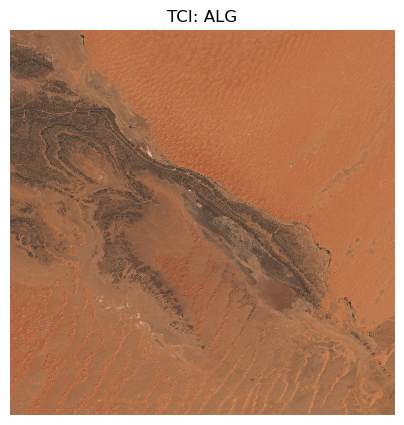

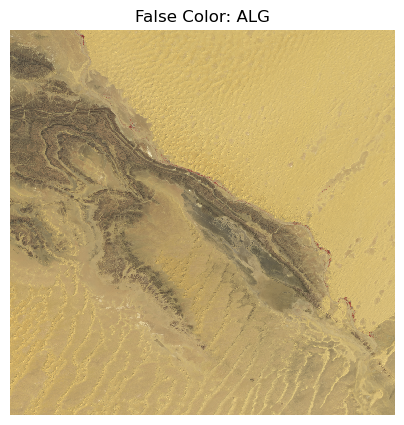

<module 'matplotlib.pyplot' from 'c:\\Users\\tlaus\\miniconda3\\envs\\sen2cor\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [9]:
SCL = l2a_analysis.reference_bands[loc]['SCL']
tci = plot_true_color_image(l2a_analysis.reference_bands[loc], gamma=3, title=f"TCI: {loc}", clip_value=10000)
plot_rgb_image(l2a_analysis.reference_bands[loc],"B8A", "B04", "B03", title=f"False Color: {loc}", clip_value=10000)
# plot_scl_in_rgb(SCL, title=loc)
# plot_scl_as_bar_chart(l2a_analysis.reference_bands[loc], title=loc)

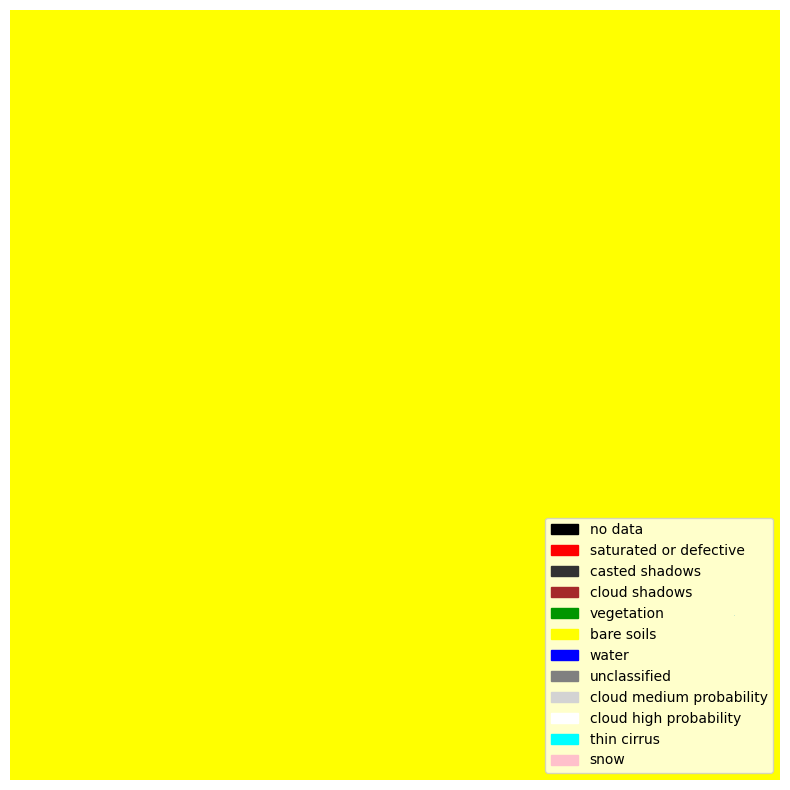

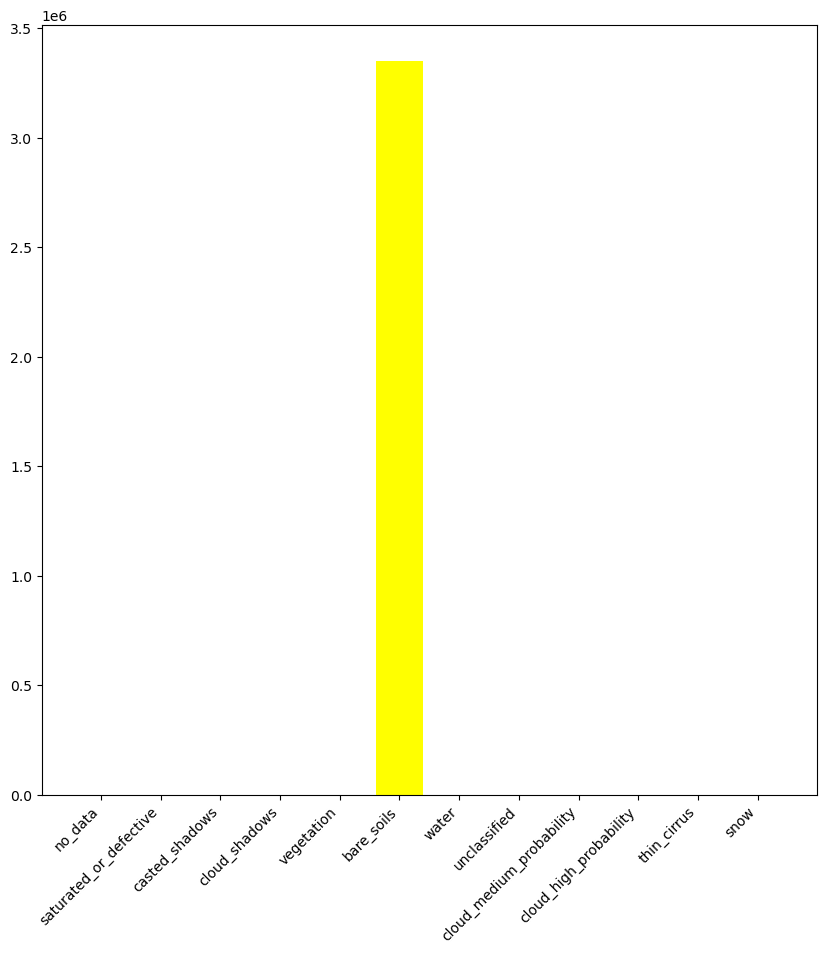

In [10]:
plot_scl_in_rgb(SCL)
plot_scl_as_bar_chart(l2a_analysis.reference_bands[loc], title="")

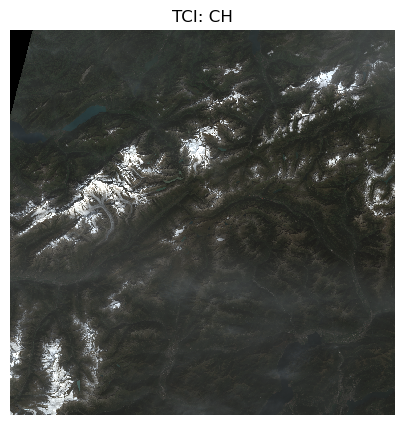

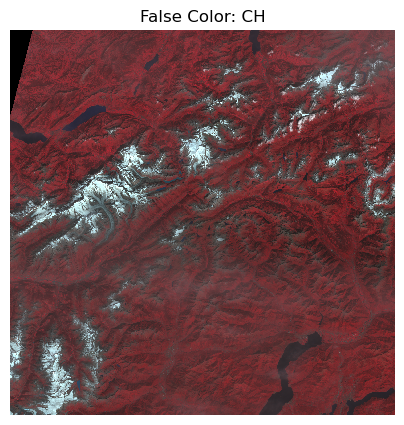

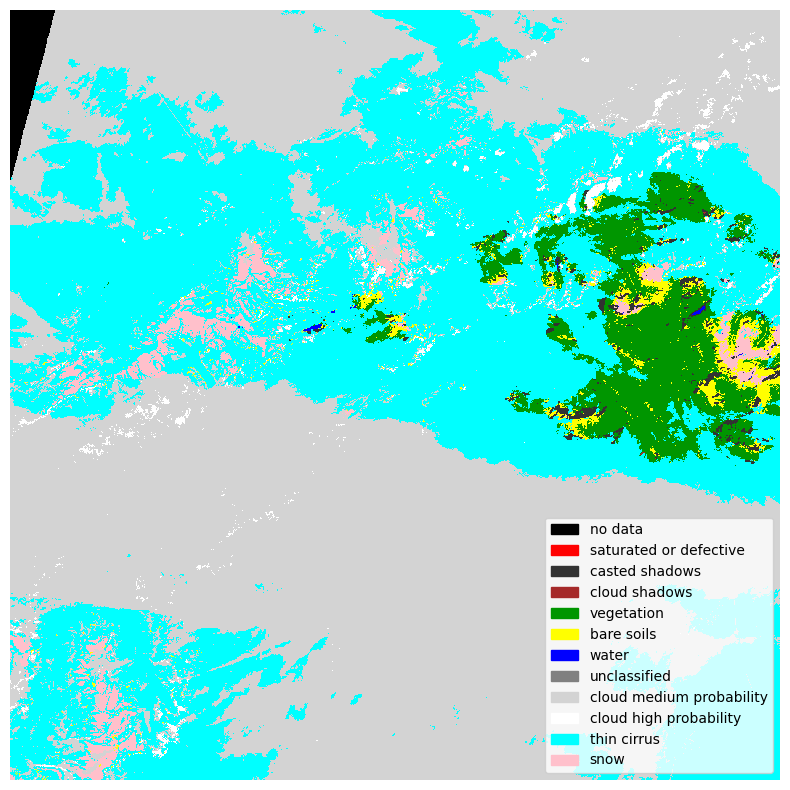

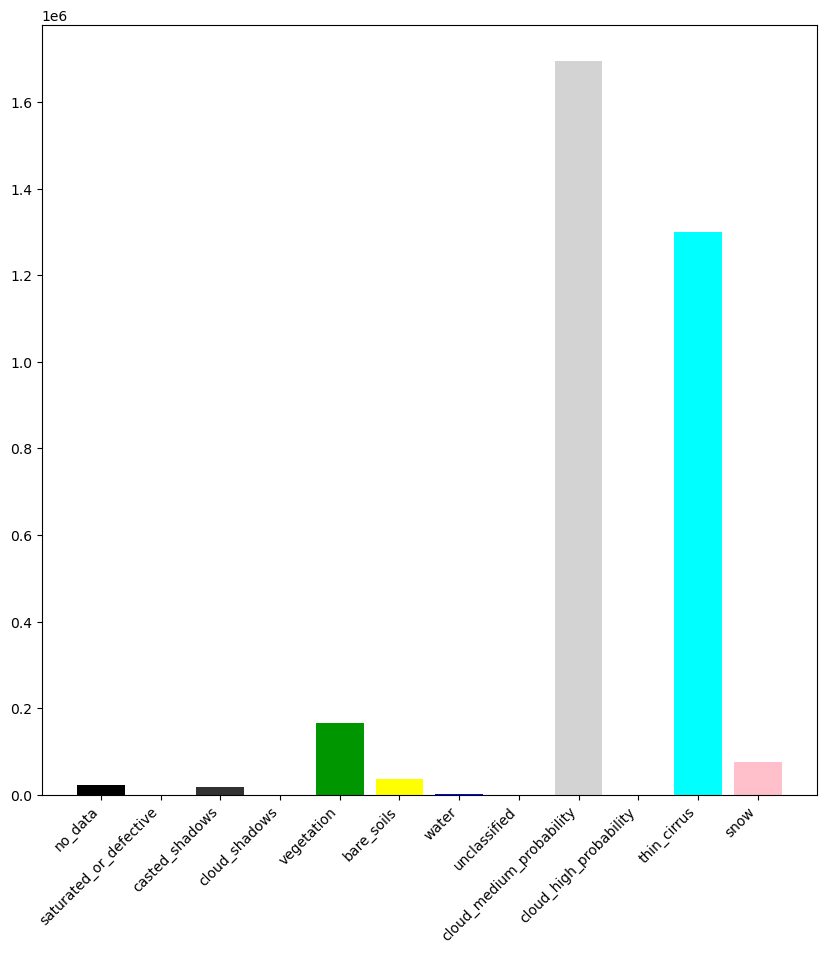

In [11]:
loc = 'CH'
SCL = l2a_analysis.reference_bands[loc]['SCL']
tci = plot_true_color_image(l2a_analysis.reference_bands[loc], gamma=3, title=f"TCI: {loc}", clip_value=10000)
plot_rgb_image(l2a_analysis.reference_bands[loc],"B8A", "B04", "B03", title=f"False Color: {loc}", clip_value=10000)
plot_scl_in_rgb(SCL)
plot_scl_as_bar_chart(l2a_analysis.reference_bands[loc], title="")

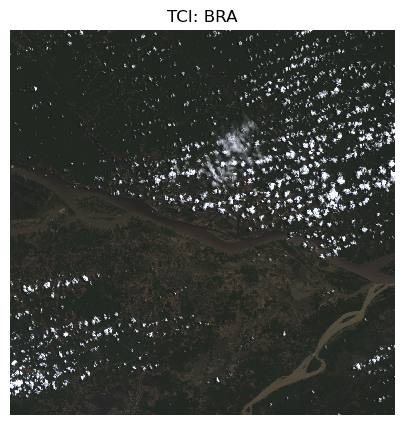

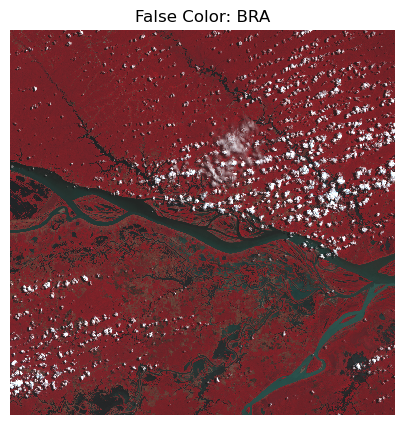

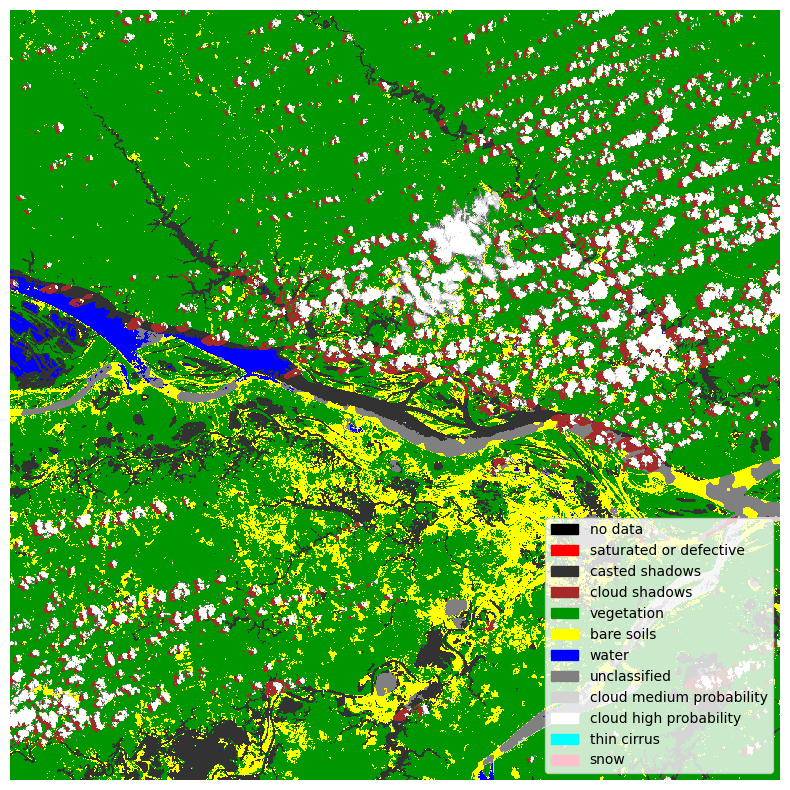

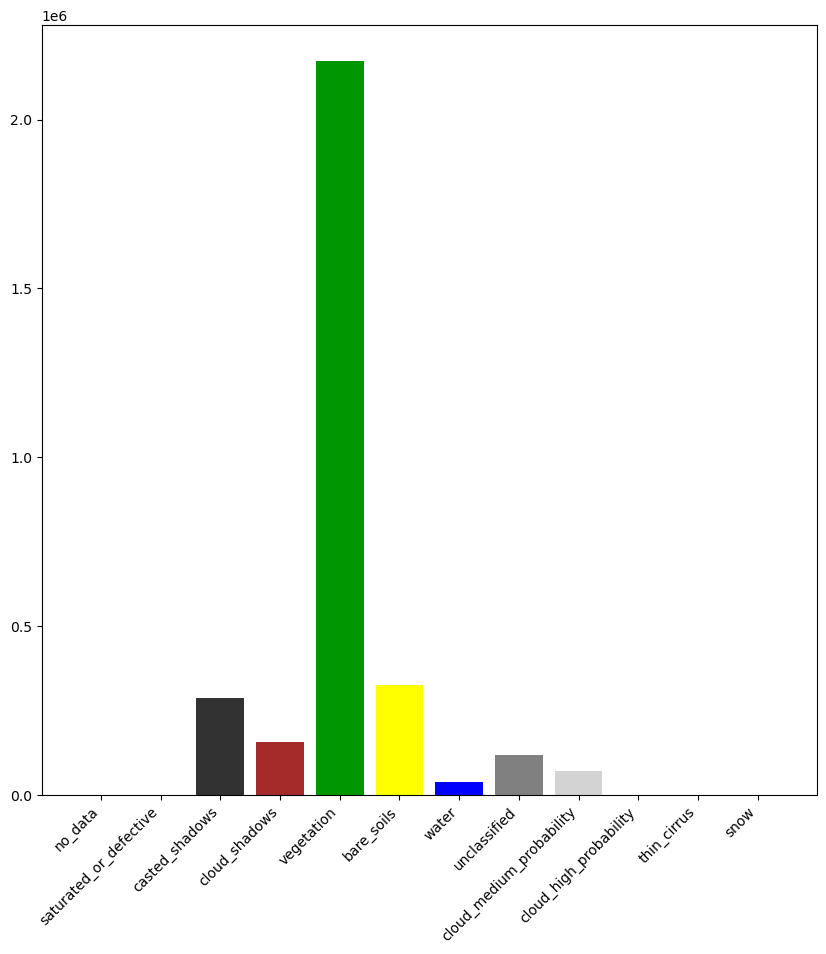

In [12]:
loc = 'BRA'
SCL = l2a_analysis.reference_bands[loc]['SCL']
tci = plot_true_color_image(l2a_analysis.reference_bands[loc], gamma=3, title=f"TCI: {loc}", clip_value=10000)
plot_rgb_image(l2a_analysis.reference_bands[loc],"B8A", "B04", "B03", title=f"False Color: {loc}", clip_value=10000)
plot_scl_in_rgb(SCL)
plot_scl_as_bar_chart(l2a_analysis.reference_bands[loc], title="")

In [13]:
l2a_analysis.data_info['reference']

[{'name': 'CH_reference',
  'loc': {'loc_name': 'CH',
   'l1c_product_name': 'D:\\snap_data\\locations\\CH\\S2A_MSIL1C_20230903T101601_N0509_R065_T32TMS_20230903T140124',
   'l1c_path': 'D:\\snap_data\\locations\\CH\\S2A_MSIL1C_20230903T101601_N0509_R065_T32TMS_20230903T140124.SAFE',
   'mission_id': 'data\\locations\\CH\\S2A',
   'date_take': '20230903T101601',
   'processing_baseline': 'N0509',
   'orbit_number': 'R065',
   'tile': 'T32TMS',
   'product_discriminator': '20230903T140124'},
  'mod': None,
  'output_dir': WindowsPath('D:/snap_data/reports/thesis/CH/reference')},
 {'name': 'BRA_reference',
  'loc': {'loc_name': 'BRA',
   'l1c_product_name': 'D:\\snap_data\\locations\\BRA\\S2A_MSIL1C_20230909T141721_N0509_R010_T21MTS_20230909T192148',
   'l1c_path': 'D:\\snap_data\\locations\\BRA\\S2A_MSIL1C_20230909T141721_N0509_R010_T21MTS_20230909T192148.SAFE',
   'mission_id': 'data\\locations\\BRA\\S2A',
   'date_take': '20230909T141721',
   'processing_baseline': 'N0509',
   'orbit_

In [14]:
locs = ["ALG", "CH", "BRA"]
bands = ["B02", "B03", "B04", "B05", "B06", "B07", "B8A", "B11", "B12"]
# bands = ["B02", "B03", "B04", "B05", "B06", "B07"]
# mods = ['SC_ONLY', 'class_NO_DATA']
mods = [
    # "class_NO_DATA",
    # "LUT_AEROSOL_MARITIME",
    # "LUT_SEASON_WINTER",
    # "LUT_OZONE_250",
    # "LUT_OZONE_450",
    "FLAG_WV_OFF",
    "FLAG_CIRRUS_ON",
    # "FLAG_CIRRUS_OFF",
    # "FLAG_BRDF_1",
    # "FLAG_BRDF_2",
    # "CALIB_VISIBILITY_20",
    # "CALIB_VISIBILITY_80",
    # "CALIB_VISIBILITY_120",
]
# multiplot_difference_histogram(l2a_analysis, locs, mods, bands, share_axes=False)

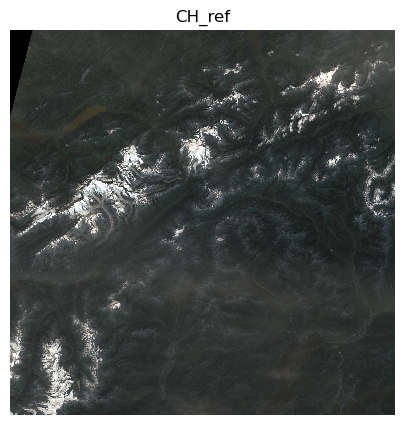

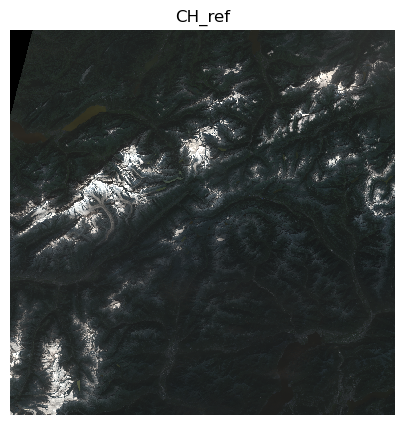

<module 'matplotlib.pyplot' from 'c:\\Users\\tlaus\\miniconda3\\envs\\sen2cor\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [15]:
plot_rgb_image(l2a_analysis.reference_bands["CH"], "B02", "B03", "B04", title="CH_ref", clip_value=10000)
plot_rgb_image(l2a_analysis.modified_bands["CH"]['FLAG_CIRRUS_ON'], "B02", "B03", "B04", title="CH_ref", clip_value=10000)

In [16]:
mods = [
    # "class_NO_DATA",
    # "LUT_AEROSOL_MARITIME",
    # "LUT_SEASON_WINTER",
    # "LUT_OZONE_250",
    # "LUT_OZONE_450",
    # "FLAG_WV_OFF",
    "FLAG_CIRRUS_ON",
    # "FLAG_CIRRUS_OFF",
    # "FLAG_BRDF_1",
    # "FLAG_BRDF_2",
    # "CALIB_VISIBILITY_20",
    # "CALIB_VISIBILITY_80",
    # "CALIB_VISIBILITY_120",
]
# multiplot_difference_histogram(l2a_analysis, locs, mods, bands, share_axes=False)
stats = get_stats_average_multi(l2a_analysis, locs, mods, stat_bands)

In [17]:

# stats = get_stats_average(l2a_analysis.reference_bands[loc], l2a_analysis.modified_bands[loc][mod], stat_bands)
print("Standard Deviation")
display(stats['std'])
print("Mean")
display(stats['mean'])
print("Max")
display(stats['max'])
print("Min")
display(stats['min'])
# concatinate all 4 dataframes
stats_df = pd.concat([stats['std'], stats['mean'], stats['max'], stats['min']], axis=1)
stats_df.columns = ["std", "mean", "max", "min"]
stats_df

Standard Deviation


FLAG_CIRRUS_ON
ALG       17.417736
CH       205.029434
BRA       94.320068

Mean


FLAG_CIRRUS_ON
ALG      115.259293
CH       421.789642
BRA       88.066010

Max


FLAG_CIRRUS_ON
ALG      170.888885
CH      1278.333374
BRA     1226.333374

Min


FLAG_CIRRUS_ON
ALG       41.000000
CH       -16.222221
BRA      -48.222221

std        mean          max        min
ALG   17.417736  115.259293   170.888885  41.000000
CH   205.029434  421.789642  1278.333374 -16.222221
BRA   94.320068   88.066010  1226.333374 -48.222221

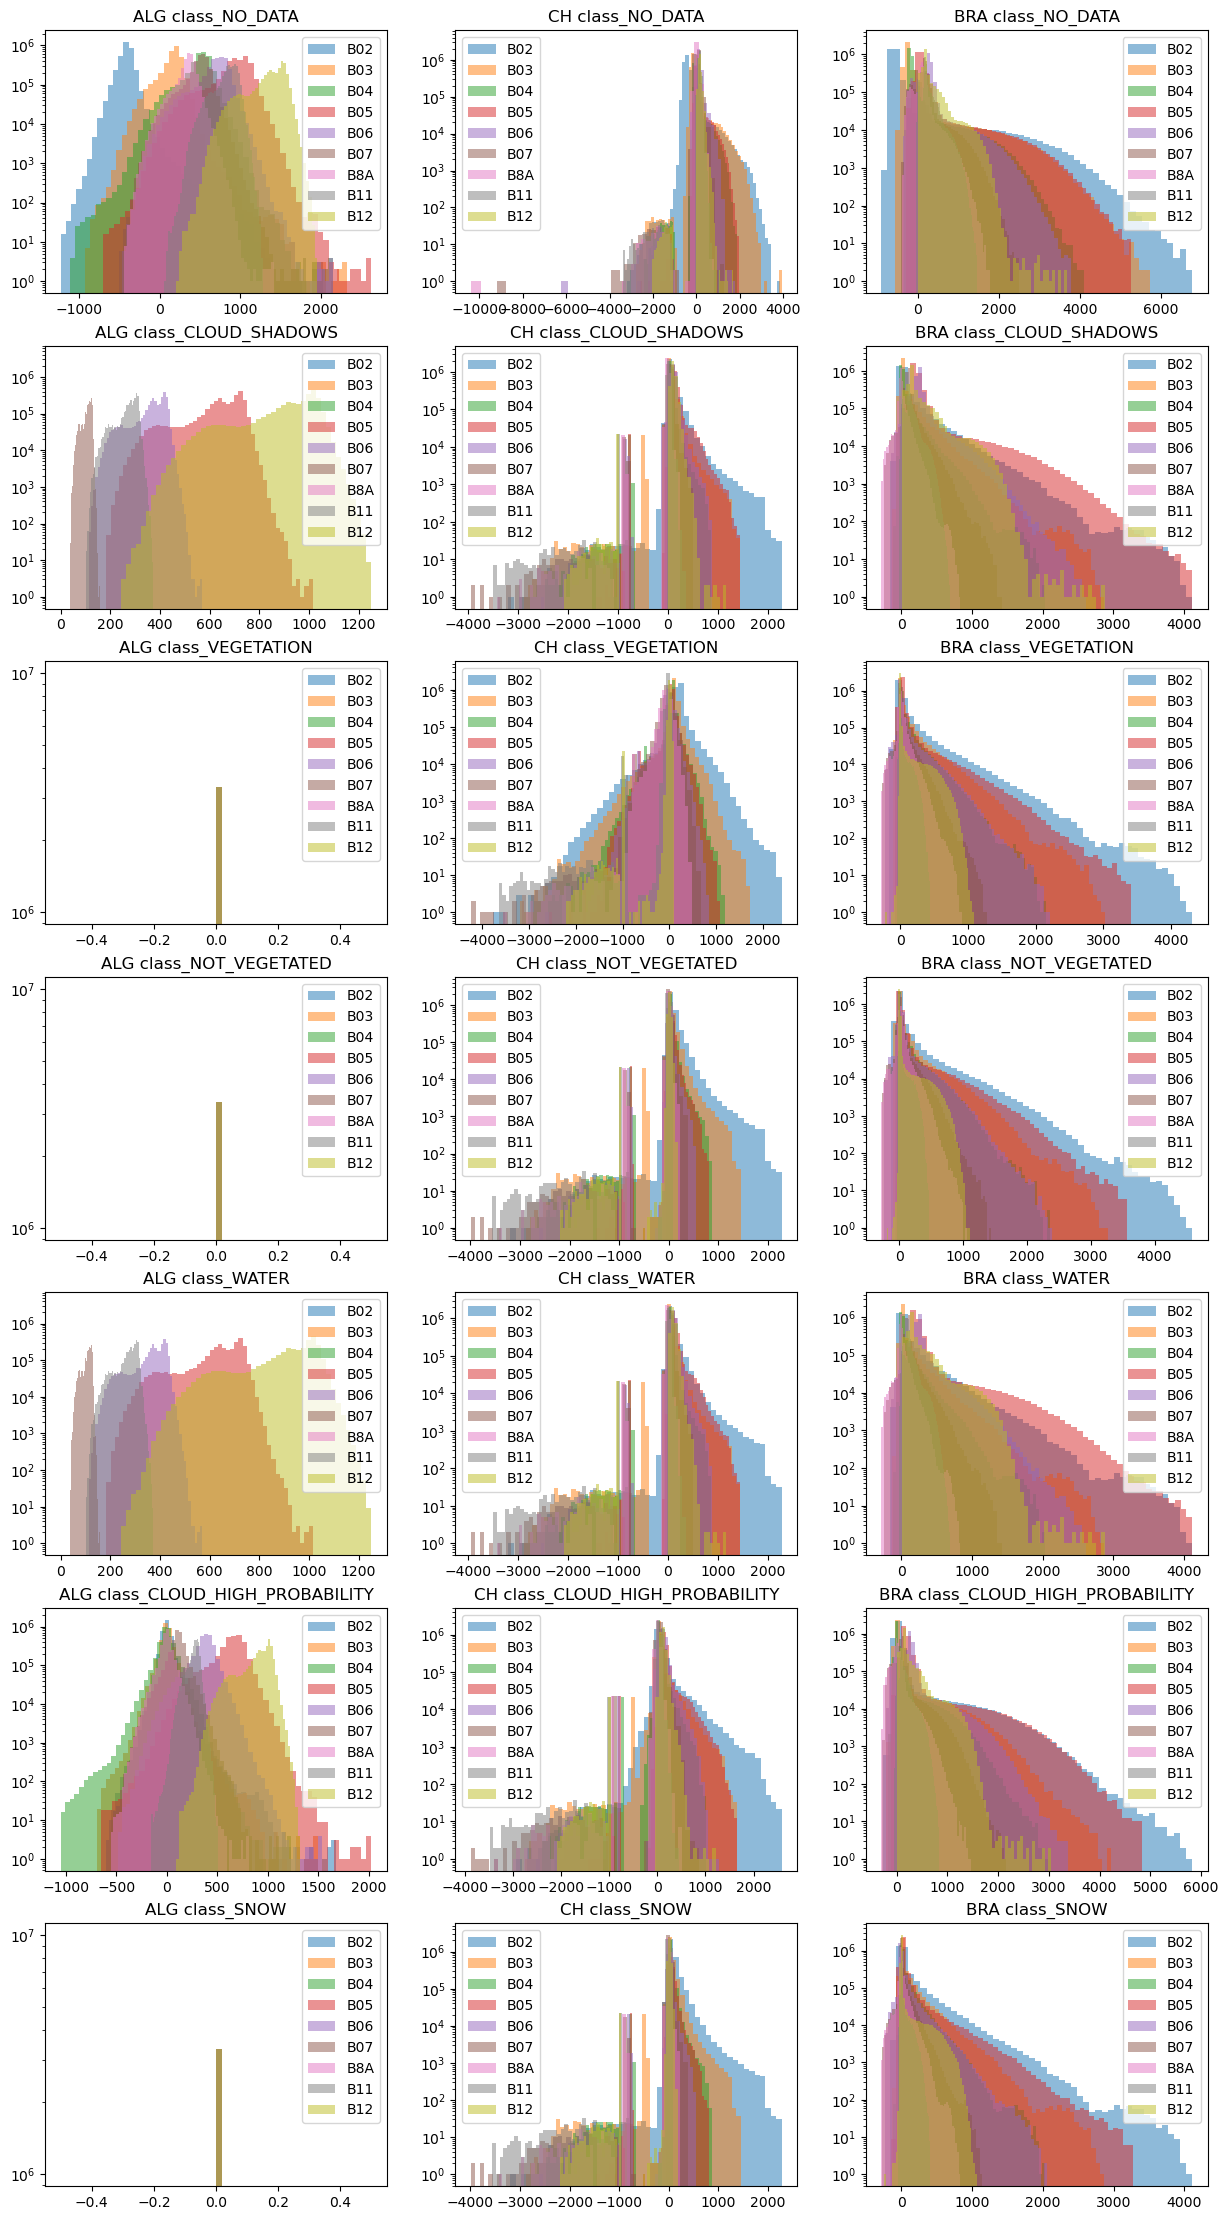

In [18]:
mods = ['class_NO_DATA',
#  'class_CASTED_SHADOWS',
 'class_CLOUD_SHADOWS',
 'class_VEGETATION',
 'class_NOT_VEGETATED',
 'class_WATER',
#  'class_UNCLASSIFIED',
 'class_CLOUD_HIGH_PROBABILITY',
#  'class_THIN_CIRRUS',
 'class_SNOW']

multiplot_difference_histogram(l2a_analysis, locs, mods, bands, share_axes=False)

In [19]:
stats = get_stats_average_multi(l2a_analysis, locs, mods, stat_bands)

In [20]:
display(stats['std'])

class_NO_DATA  class_CLOUD_SHADOWS  class_VEGETATION  \
ALG     165.317825            42.092976          0.000000   
CH      161.361542           100.721680        125.817680   
BRA     344.791626           155.903351        130.440369   

     class_NOT_VEGETATED  class_WATER  class_CLOUD_HIGH_PROBABILITY  \
ALG             0.000000    42.092976                     92.859726   
CH             90.005951   100.721680                    115.144623   
BRA           143.259033   155.903351                    233.709366   

     class_SNOW  
ALG    0.000000  
CH    90.005951  
BRA  120.301544

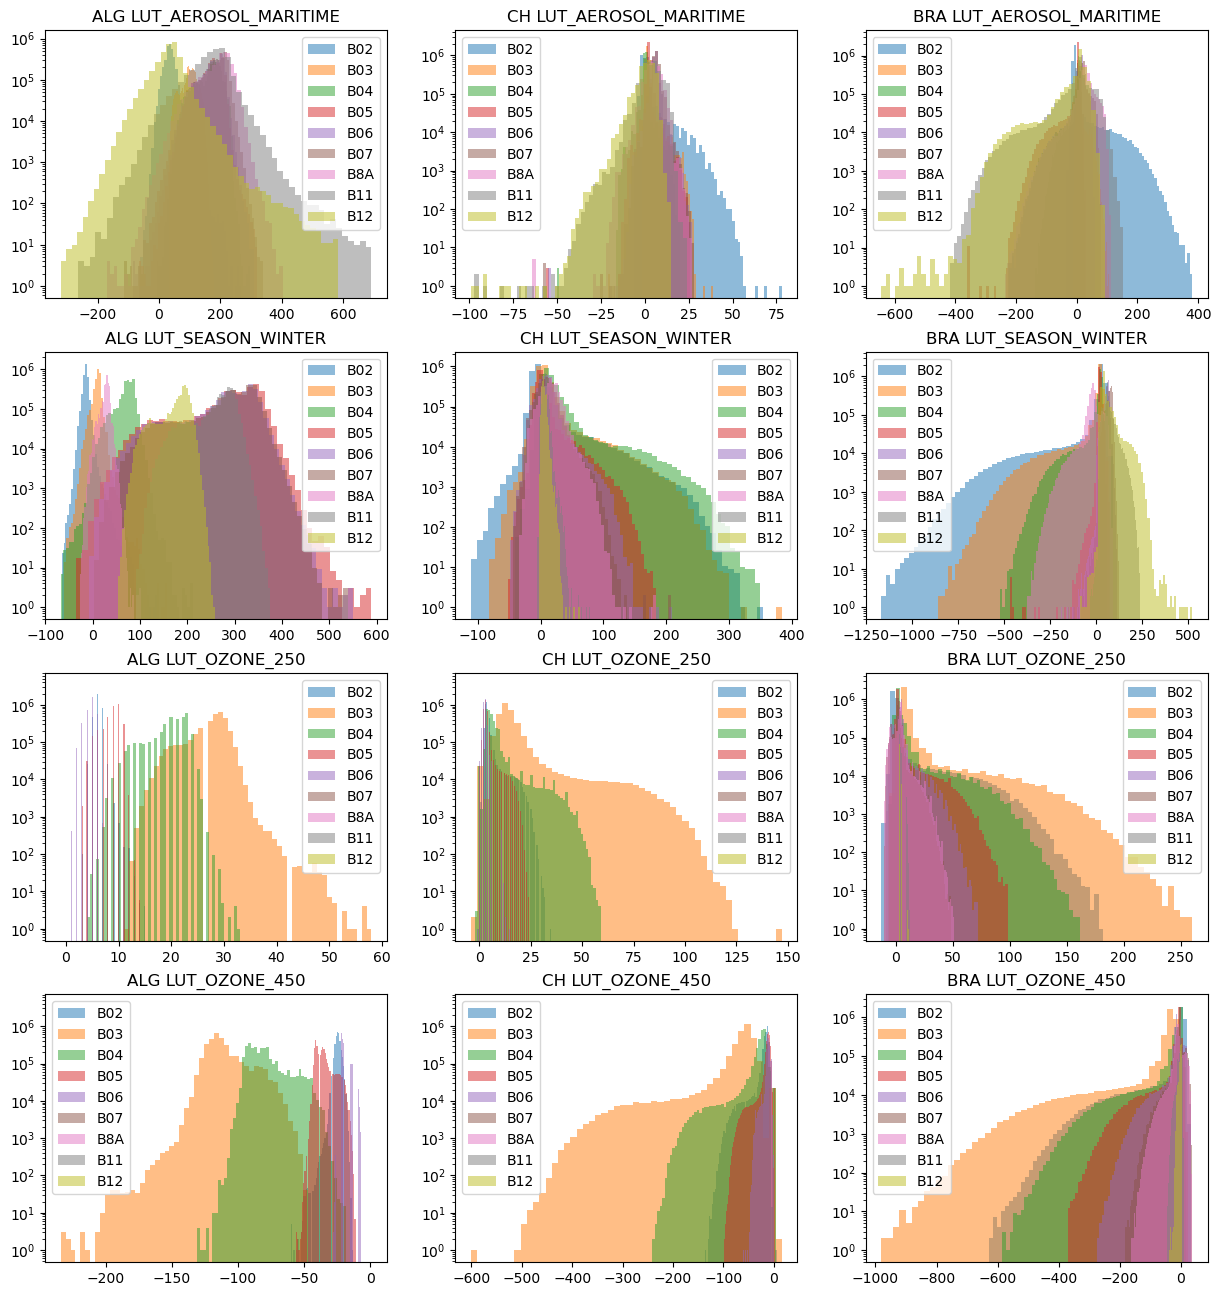

In [185]:
mods = [ 'LUT_AEROSOL_MARITIME',
 'LUT_SEASON_WINTER',
#  'LUT_OZONE_250',
#  'LUT_OZONE_450',
 ]
multiplot_difference_histogram(l2a_analysis, locs, mods, bands, share_axes=False)

In [186]:
for loc in l2a_analysis.data_info['reference']:
    # print tile
    print(loc)

{'name': 'CH_reference', 'loc': {'loc_name': 'CH', 'l1c_product_name': 'D:\\snap_data\\locations\\CH\\S2A_MSIL1C_20230903T101601_N0509_R065_T32TMS_20230903T140124', 'l1c_path': 'D:\\snap_data\\locations\\CH\\S2A_MSIL1C_20230903T101601_N0509_R065_T32TMS_20230903T140124.SAFE', 'mission_id': 'data\\locations\\CH\\S2A', 'date_take': '20230903T101601', 'processing_baseline': 'N0509', 'orbit_number': 'R065', 'tile': 'T32TMS', 'product_discriminator': '20230903T140124'}, 'mod': None, 'output_dir': WindowsPath('D:/snap_data/reports/thesis/CH/reference')}
{'name': 'BRA_reference', 'loc': {'loc_name': 'BRA', 'l1c_product_name': 'D:\\snap_data\\locations\\BRA\\S2A_MSIL1C_20230909T141721_N0509_R010_T21MTS_20230909T192148', 'l1c_path': 'D:\\snap_data\\locations\\BRA\\S2A_MSIL1C_20230909T141721_N0509_R010_T21MTS_20230909T192148.SAFE', 'mission_id': 'data\\locations\\BRA\\S2A', 'date_take': '20230909T141721', 'processing_baseline': 'N0509', 'orbit_number': 'R010', 'tile': 'T21MTS', 'product_discrimin

In [187]:
stats = get_stats_average_multi(l2a_analysis, locs, mods, stat_bands)
display(stats['std'])

LUT_AEROSOL_MARITIME  LUT_SEASON_WINTER  LUT_OZONE_250  LUT_OZONE_450
ALG             36.855675          35.254227       1.117643       4.362608
CH               3.159870          16.528734       2.587584      10.427222
BRA             27.831757          39.905716       8.519032      31.069479